## (a) $V_\text{in}(t) = \pm1 \text{if} \left \lfloor{2t}\right \rfloor \text{is even/odd}$

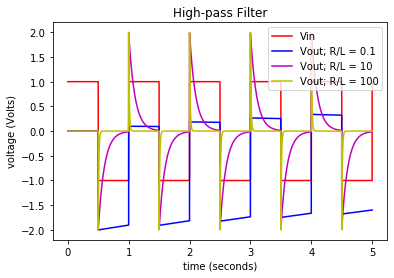

In [2]:
%matplotlib inline
from math import floor
from numpy import linspace
from pylab import plot, show, xlabel, ylabel, title, legend
t0 = 0                         # initial time
tf = 5                        # final time
N = 10000                     # number time values
dt = (tf - t0)/N               # time step
tvals  = linspace(t0, tf, N)   # array of time values
v1 = 0      
v2 = 0
v3 = 0                
v1out = []
v2out = []
v3out = []

def Vin(t):
    if floor(2*t) % 2 == 0:
        return 1
    else:
        return -1
        
def Vinprime(t):
    return (Vin(t + dt) - Vin(t)) / dt

def Voutprime(t, rl, vout):
    return Vinprime(t) - rl*vout

for t in tvals:
    v1out.append(v1)
    v2out.append(v2)
    v3out.append(v3)
    v1 += dt*Voutprime(t, 0.1, v1) ##blue plot
    v2 += dt*Voutprime(t, 10, v2)  ##magenta plot
    v3 += dt*Voutprime(t, 100, v3)    ##yellow plot

vin = [Vin(t) for t in tvals]

# plot results
plot(tvals, vin, "r-", label="Vin")
plot(tvals, v1out, "b-", label="Vout; R/L = 0.1") 
plot(tvals, v2out, "m-", label="Vout; R/L = 10") 
plot(tvals, v3out, "y-", label="Vout; R/L = 100") 
xlabel("time (seconds)")
ylabel("voltage (Volts)")
title("High-pass Filter")
legend()
show()


## (b) $V_\text{in}(t) = \sin(t) + \sin(10t) + \sin(100t)$

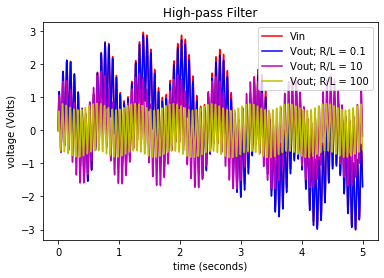

In [1]:
%matplotlib inline
from math import floor, sin
from numpy import linspace
from pylab import plot, show, xlabel, ylabel, title, legend
t0 = 0                         # initial time
tf = 5                        # final time
N = 10000                     # number time values
dt = (tf - t0)/N               # time step
tvals  = linspace(t0, tf, N)   # array of time values
v1 = 0      
v2 = 0
v3 = 0                
v1out = []
v2out = []
v3out = []

def Vin(t):
    return sin(t) + sin(10*t) + sin(100*t)
        
def Vinprime(t):
    return (Vin(t + dt) - Vin(t)) / dt

def Voutprime(t, rl, vout):
    return Vinprime(t) - rl*vout

for t in tvals:
    v1out.append(v1)
    v2out.append(v2)
    v3out.append(v3)
    v1 += dt*Voutprime(t, 0.1, v1) ##blue plot
    v2 += dt*Voutprime(t, 10, v2)  ##magenta plot
    v3 += dt*Voutprime(t, 100, v3)    ##yellow plot

vin = [Vin(t) for t in tvals]

# plot results
plot(tvals, vin, "r-", label="Vin")
plot(tvals, v1out, "b-", label="Vout; R/L = 0.1") 
plot(tvals, v2out, "m-", label="Vout; R/L = 10") 
plot(tvals, v3out, "y-", label="Vout; R/L = 100") 
xlabel("time (seconds)")
ylabel("voltage (Volts)")
title("High-pass Filter")
legend()
show()


## (c) Explaination of high-pass filter



Like the name implies, a high pass filter lets higher frequencies pass through. Notice that the higher frequency term from the input are present in the output. This is because it filters out only the low frequencies. In terms of what the circuit is doing, the inductor induces a magnetic field that is stronger when Vinprime is large. This limits the flow of current through the resistor and thus the voltage frop across the resistor. This means that very high frequencies are let through but the ones with small derivatives are canceled out.